In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import numpy as np

In [53]:
def plot_globaly(plot_data,title,tcol,figfile,vmin,vmax):
    fig   = plt.figure(figsize=(15,10))
    fsize = 16
    ax    = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-100,40,0,80])
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='0.5'))
    ax.coastlines()
    ax.gridlines()

    plt.pcolormesh(lon,lat,plot_data,transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmap)
    cb = plt.colorbar(extend='both',orientation='horizontal')
    cb.ax.tick_params(labelsize=fsize)
    cb.set_label('temperature anomaly ($^\circ$C)',size=fsize)
    plt.title(title,fontsize=fsize,color=tcol)
    
    # Winter Lat, South:
    imin = -40
    imax = -10
    jmin = 10
    jmax = 35
    plt.text(imin+2.5,jmin+2.5,'Winter South',fontsize=16,color='k')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='k',lw=3)
    
    # Summer Lat, South:
    imin = -60
    imax = -10
    jmin = 20
    jmax = 35
    plt.text(imin+2.5,jmin+2.5,'Summer South',fontsize=16,color='C1')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='C1',lw=3)
    
    # Winter Lat, Middle:
    imin = -80
    imax = -30
    jmin = 25
    jmax = 50
    plt.text(imin+2.5,jmin+2.5,'Winter Middle',fontsize=16,color='k')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='k',lw=3)
    
    # Summer Lat, Middle:
    imin = -60
    imax = -20
    jmin = 35
    jmax = 50
    plt.text(imin+2.5,jmin+2.5,'Summer Middle',fontsize=16,color='C2')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='C2',lw=3)
    
    # Winter Lat, North:
    imin = -60
    imax = -20
    jmin = 45
    jmax = 70
    plt.text(imin+2.5,jmin+2.5,'Winter North',fontsize=16,color='k')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='k',lw=3)
    
    # Summer Lat, North:
    imin = -60
    imax = -20
    jmin = 50
    jmax = 70
    plt.text(imin+2.5,jmin+2.5,'Summer North',fontsize=16,color='C4')
    plt.plot([imin,imin,imax,imax,imin],[jmin,jmax,jmax,jmin,jmin],color='C4',lw=3)
    plt.show()

    fig.savefig(figfile,dpi=100,bbox_inches='tight', pad_inches=0.1)

In [3]:
datadir = '/gws/nopw/j04/acsis/jmecking/CMIP6/composites/'
figdir  = 'jet_figures/210802'

EXP          = 'piControl'
var_ts       = 'max_lats'
#var_ts       = 'max_wind'
var_field    = 'tos'
season_ts    = ['DJF','MAM','JJA','SON']
season_field = ['DJF','MAM','JJA','SON']
ns = len(season_ts)

p_models  = ['CESM2-FV2_r1i1p1f1', 'NESM3_r1i1p1f1'] # Problem with these models - need to investigate!
plot_lag = 0

cmap  = plt.get_cmap('seismic',21)
vmin  = -0.5*1.05
vmax  = 0.5*1.05
vmind = -1*1.05
vmaxd = 1*1.05
if var_ts == 'max_lats':
    lmin  = 'southernly jet (< mean - std)'
    lmax  = 'northernly jet (> mean + std)'
elif var_ts == 'max_wind':
    lmin  = 'weak jet (< mean - std)'
    lmax  = 'strong jet (> mean + std)'
    
infile = (datadir + EXP + '_' + var_ts + '-' + season_ts[0] + '_' + var_field + '-' + season_field[0] +'_std.nc' )
    
# Read in information:
ncid   = Dataset(infile,'r')
lon    = ncid.variables['lon'][:]
lat    = ncid.variables['lat'][:]
ncid.close()

In [54]:
# Loop through each season combination and compute data:
mean_MMM = np.zeros((ns,np.size(lat),np.size(lon)),'float')
min1_MMM = np.zeros((ns,np.size(lat),np.size(lon)),'float')
max1_MMM = np.zeros((ns,np.size(lat),np.size(lon)),'float')

for ss in range(0,ns):
    infile = (datadir + EXP + '_' + var_ts + '-' + season_ts[ss] + '_' + var_field + '-' + season_field[ss] +'_std.nc' )
    
    # Read in information:
    ncid   = Dataset(infile,'r')
    lags   = ncid.variables['lags'][:]
    models = ncid.variables['models'][:]
    ncid.close()

    nm = len(models)
    nl = np.size(lags)

    ll = np.squeeze(np.where(lags == plot_lag))
    
    cc = 0
    for mm in range(0,nm):
        print(models[mm])
        model = models[mm].split('_')[0]
        ENS   = models[mm].split('_')[1]

        ncid      = Dataset(infile,'r')
        data_mean = ncid.variables['mean'][mm,:,:]
        data_min1 = ncid.variables['min_std1'][mm,ll,:,:]
        data_max1 = ncid.variables['max_std1'][mm,ll,:,:]
        ncid.close()

        if models[mm] not in p_models:
            cc = cc + 1
            mean_MMM[ss,:,:] = mean_MMM[ss,:,:] + data_mean
            min1_MMM[ss,:,:] = min1_MMM[ss,:,:] + data_min1
            max1_MMM[ss,:,:] = max1_MMM[ss,:,:] + data_max1

    mean_MMM[ss,:,:] = mean_MMM[ss,:,:]/cc
    min1_MMM[ss,:,:] = min1_MMM[ss,:,:]/cc
    max1_MMM[ss,:,:] = max1_MMM[ss,:,:]/cc  

ACCESS-CM2_r1i1p1f1
ACCESS-ESM1-5_r1i1p1f1
BCC-CSM2-MR_r1i1p1f1
BCC-ESM1_r1i1p1f1
CAMS-CSM1-0_r1i1p1f1
CAS-ESM2-0_r1i1p1f1
CESM2_r1i1p1f1
CESM2-FV2_r1i1p1f1
CESM2-WACCM_r1i1p1f1
CESM2-WACCM-FV2_r1i1p1f1
CIESM_r1i1p1f1
CMCC-CM2-SR5_r1i1p1f1
CNRM-CM6-1_r1i1p1f2
CNRM-CM6-1-HR_r1i1p1f2
CNRM-ESM2-1_r1i1p1f2
CanESM5_r1i1p1f1
CanESM5_r1i1p2f1
EC-Earth3_r1i1p1f1
EC-Earth3-AerChem_r1i1p1f1
EC-Earth3-Veg_r1i1p1f1
EC-Earth3-Veg-LR_r1i1p1f1
FGOALS-f3-L_r1i1p1f1
FGOALS-g3_r1i1p1f1
FIO-ESM-2-0_r1i1p1f1
GFDL-CM4_r1i1p1f1
HadGEM3-GC31-LL_r1i1p1f1
HadGEM3-GC31-MM_r1i1p1f1
IPSL-CM6A-LR_r1i1p1f1
IPSL-CM6A-LR_r1i2p1f1
MCM-UA-1-0_r1i1p1f1
MIROC-ES2L_r1i1p1f2
MIROC6_r1i1p1f1
MPI-ESM-1-2-HAM_r1i1p1f1
MPI-ESM1-2-HR_r1i1p1f1
MPI-ESM1-2-LR_r1i1p1f1
MRI-ESM2-0_r1i1p1f1
NESM3_r1i1p1f1
NorESM2-MM_r1i1p1f1
UKESM1-0-LL_r1i1p1f2
ACCESS-CM2_r1i1p1f1
ACCESS-ESM1-5_r1i1p1f1
BCC-CSM2-MR_r1i1p1f1
BCC-ESM1_r1i1p1f1
CAMS-CSM1-0_r1i1p1f1
CAS-ESM2-0_r1i1p1f1
CESM2_r1i1p1f1
CESM2-FV2_r1i1p1f1
CESM2-WACCM_r1i1p1f1
CESM2-WACCM-F

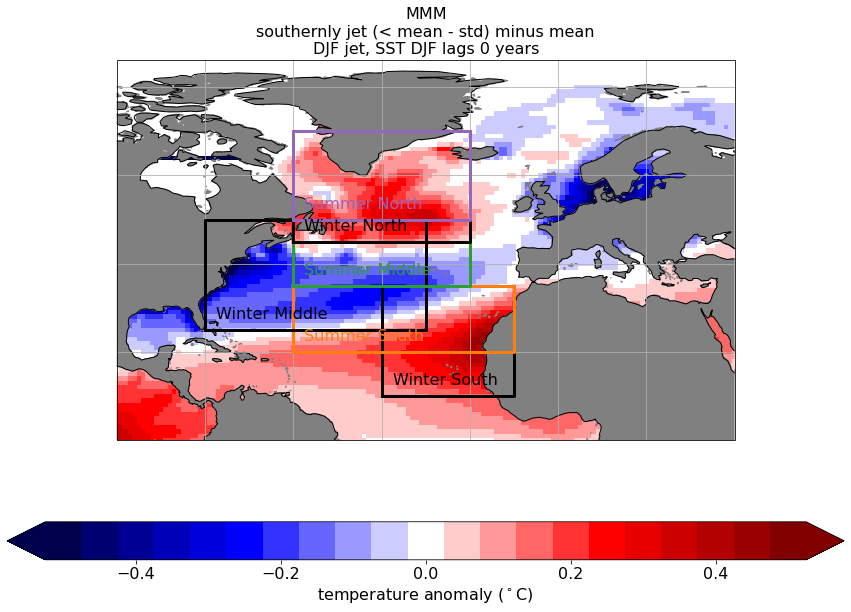

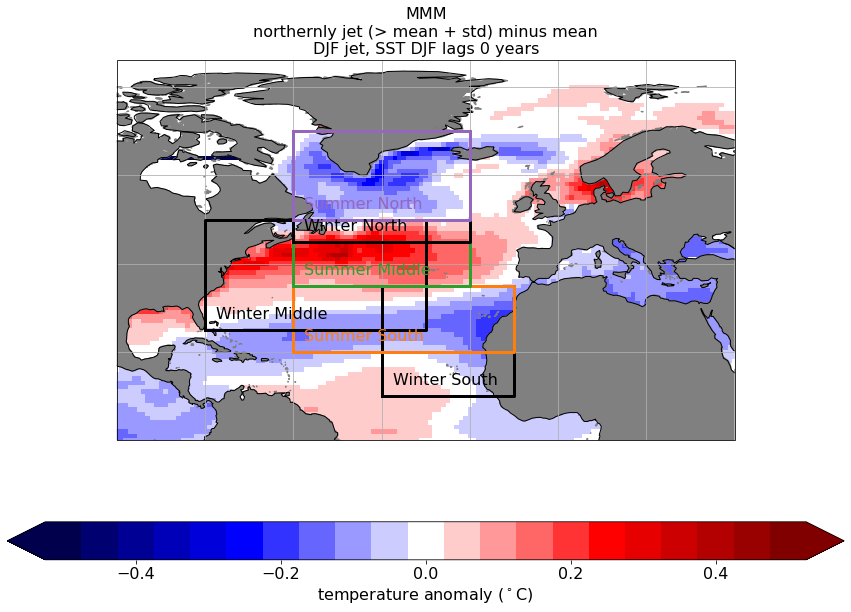

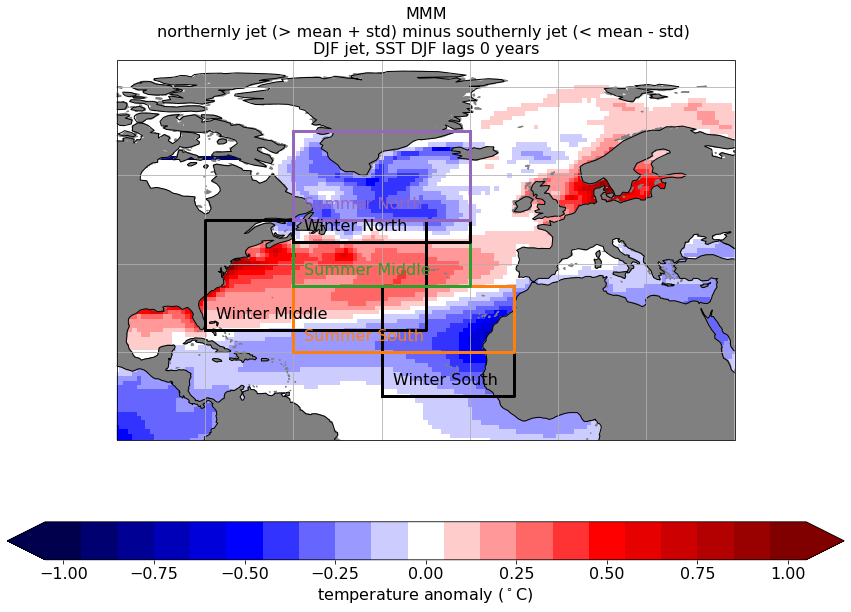

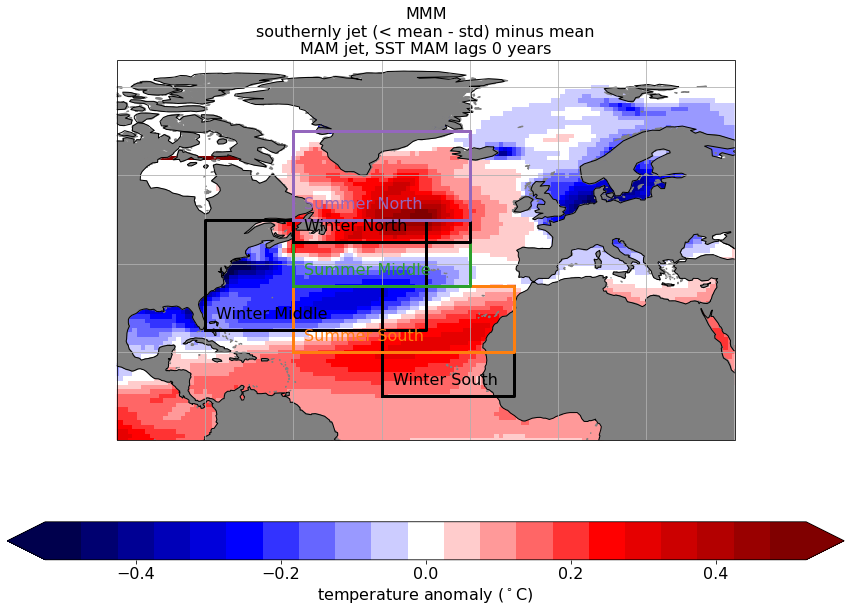

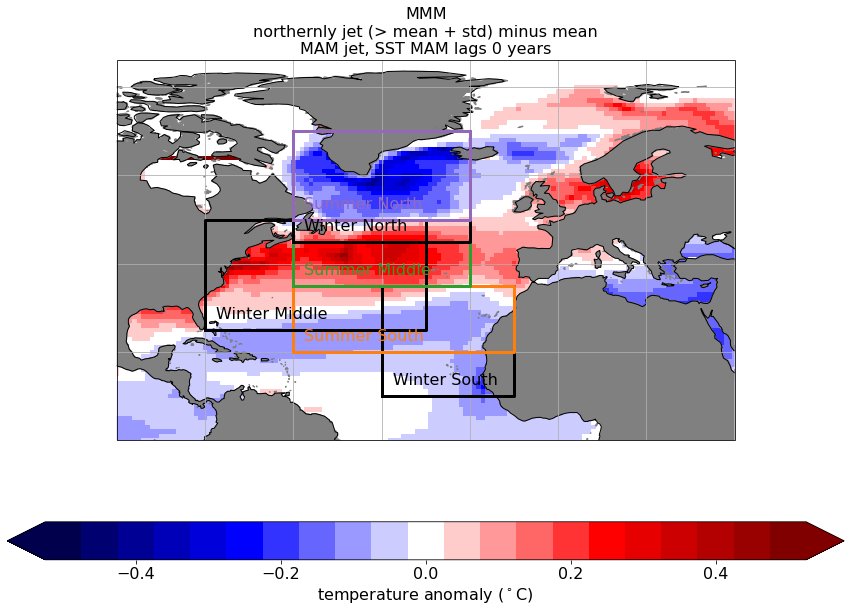

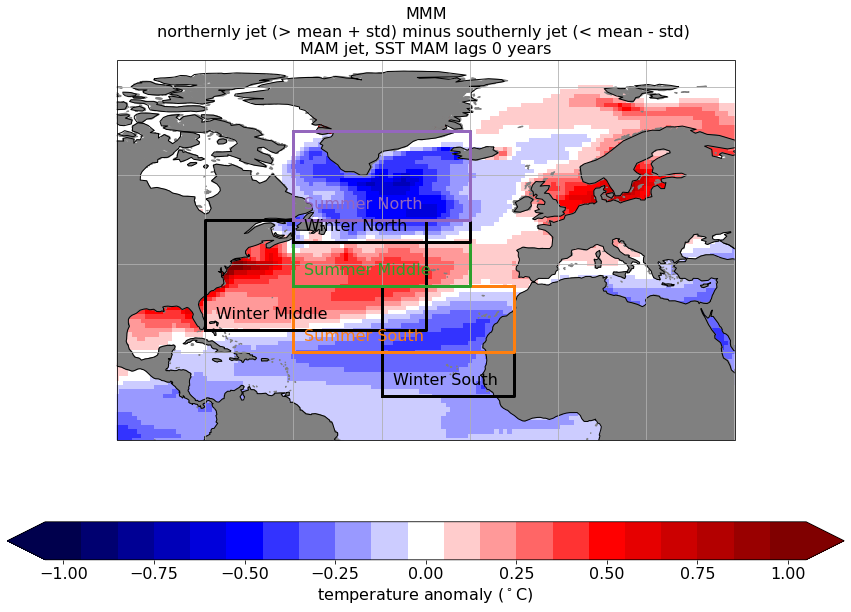

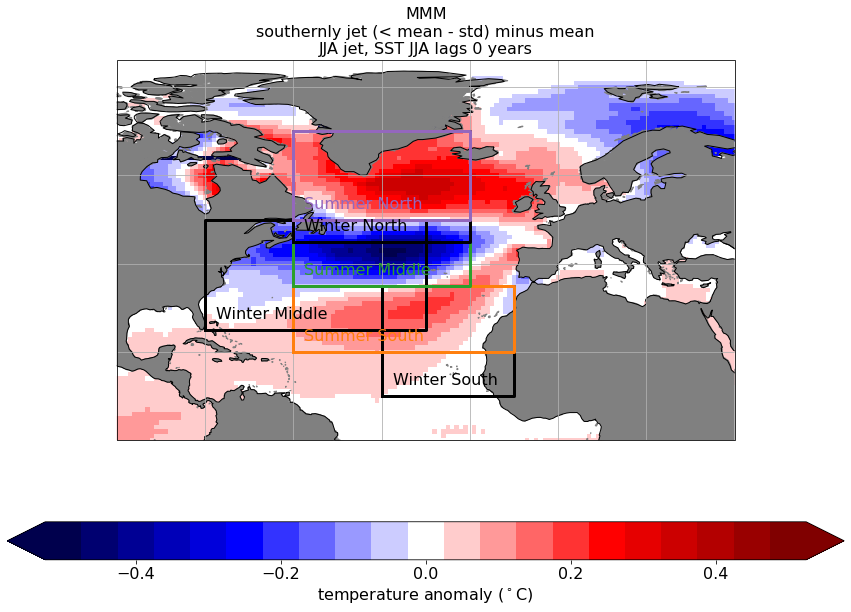

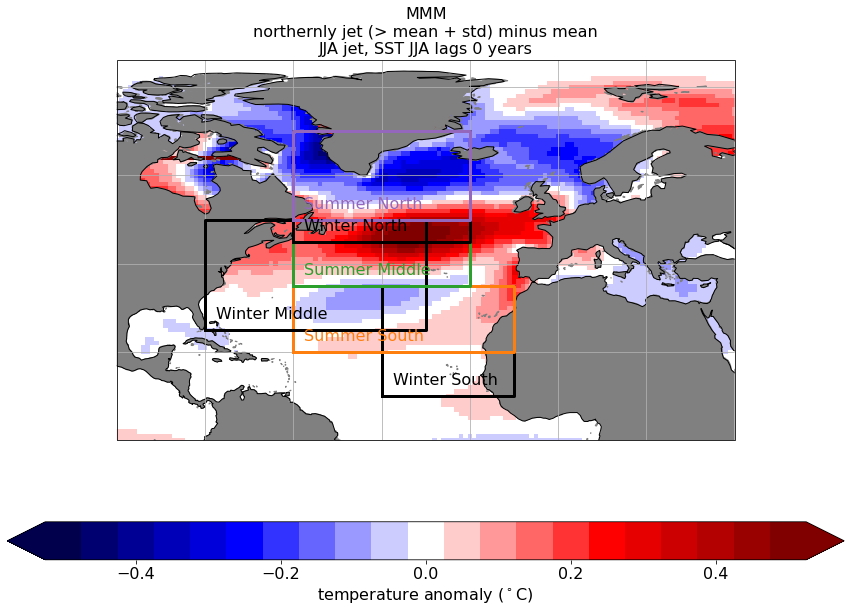

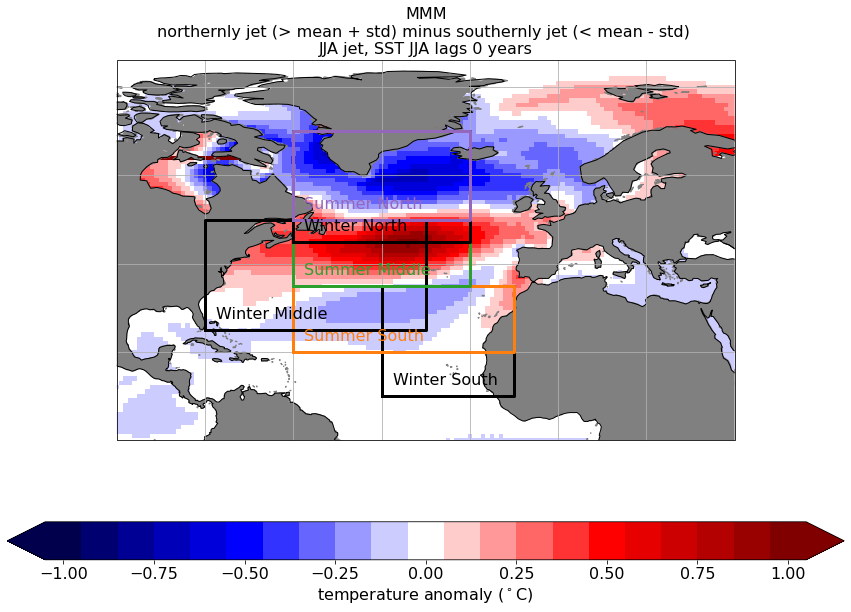

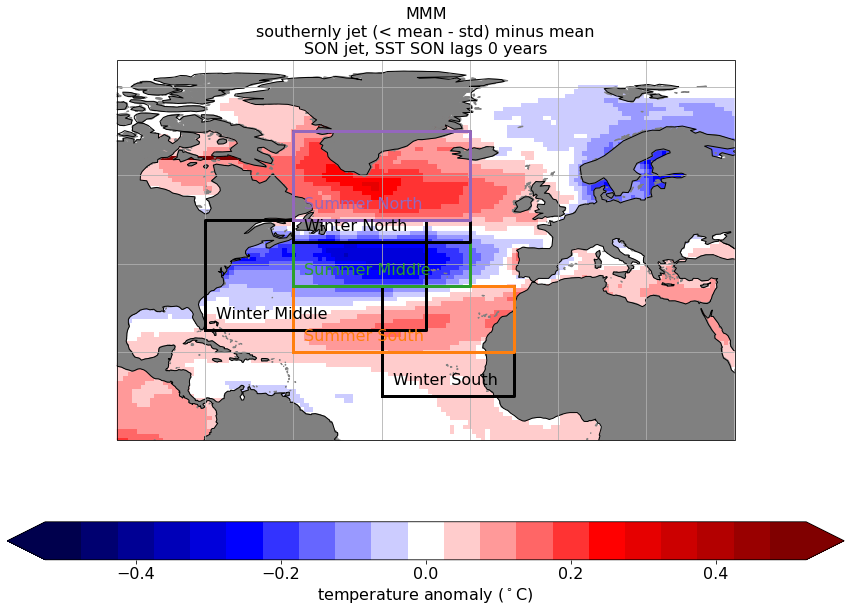

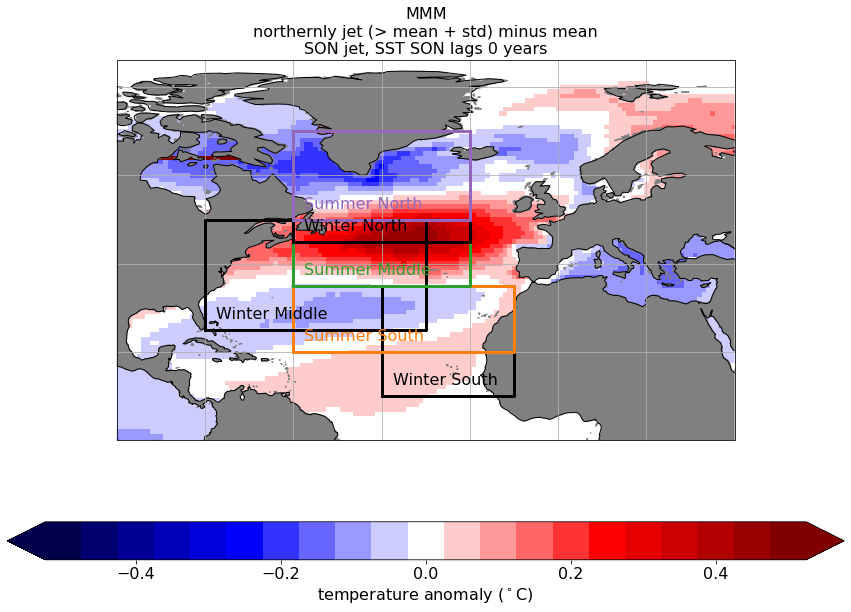

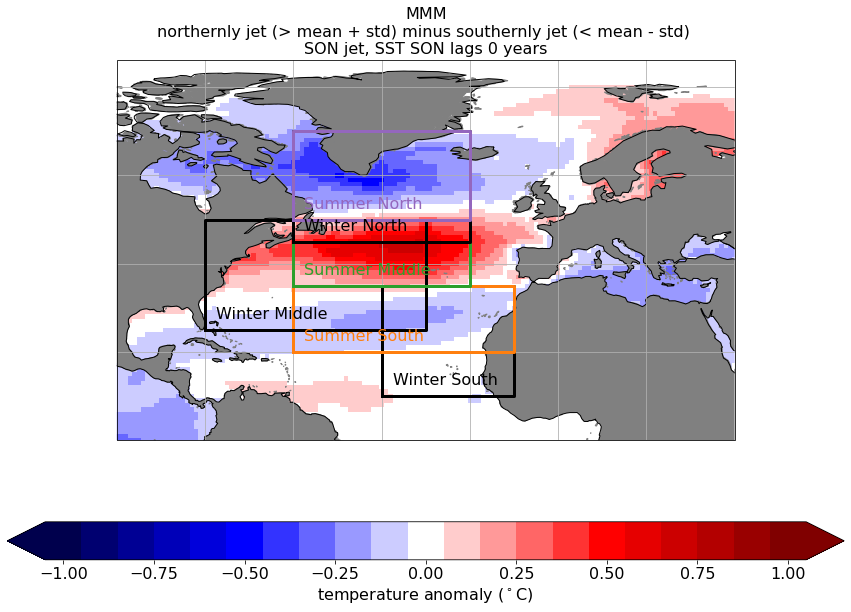

In [55]:
# Loop through each season combination and plot data:
for ss in range(0,ns):
    # Plot multi-model mean: 
    plot_globaly(min1_MMM[ss,:,:]-mean_MMM[ss,:,:],
                 ('MMM\n' + lmin + ' minus mean\n' + season_ts[ss] +
                 ' jet, SST ' + season_field[ss] + ' lags ' + str(plot_lag) + ' years'),'k',
                 (figdir + '/' + 'MMM_' + var_ts + '-' + season_ts[ss] + '_' + var_field +
                 '-' + season_field[ss] + '_min-mean_1std_lag' + str(plot_lag) + '_boxes.png'),vmin,vmax)

    plot_globaly(max1_MMM[ss,:,:]-mean_MMM[ss,:,:],
                 ('MMM\n' + lmax + ' minus mean\n' + season_ts[ss] +
                 ' jet, SST ' + season_field[ss] + ' lags ' + str(plot_lag) + ' years'),'k',
                 (figdir + '/' + 'MMM_' + var_ts + '-' + season_ts[ss] + '_' + var_field +
                 '-' + season_field[ss] + '_max-mean_1std_lag' + str(plot_lag) + '_boxes.png'),vmin,vmax)

    plot_globaly(max1_MMM[ss,:,:]-min1_MMM[ss,:,:],
                 ('MMM\n' + lmax + ' minus ' + lmin + ' \n' + season_ts[ss] +
                 ' jet, SST ' + season_field[ss] + ' lags ' + str(plot_lag) + ' years'),'k',
                 (figdir + '/' + 'MMM_' + var_ts + '-' + season_ts[ss] + '_' + var_field +
                  '-' + season_field[ss] + '_max-min_1std_lag' + str(plot_lag) + '_boxes.png'),vmind,vmaxd)